<a href="https://colab.research.google.com/github/duntik/programming-for-data/blob/main/R_Life_expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Life Expectancy 
---

Using what you learnt in the previous worksheet, you will be performing a multiple linear regression on the life expectancy dataset. You will be using your statistical knowledge to see which (if any) of the variables predict life expectancy.  

URL = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/Life%20Expectancy%20Data.csv"

### **The data in question:**

The variables:

* Country 
* Year 
* Status - developing or developed status
* Life expectancy - in age (Target variable or IV)
* Adult mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
* infant deaths - Number of Infant Deaths per 1000 population
* Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
* Percentage expenditure - Expenditure on health as a percentage of GDP per capita(%)
* Hepititis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* Measles - Measles - number of reported cases per 1000 population
* BMI - Average Body Mass Index of entire population
* Under five deaths - Number of under-five deaths per 1000 population
* Polio - Polio immunization coverage among 1-year-olds (%)
* Total expenditure - General government expenditure on health as a percentage of total government expenditure (%)
* Diphtheria - Diphtheria tetanus toxoid and pertussis immunization coverage among 1-year-olds (%)
* Deaths per 1 000 live births HIV/AIDS (0-4 years)
* GDP - per capita in USD 
* Population
* thinness 10-19 years - Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
* thinness 5-9 years - Prevalence of thinness among children for Age 5 to 9(%)
* Income composition - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* Schooling - Number of years of Schooling(years)

**Run the cell block below to install and load the necessary packages**

In [1]:
# this code needs to be run once to install the packages on your system
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("fastDummies")

# this code needs to be run to open the packages 

# tidyverse includes dpylr which includes all the functions such as mutate, select, summarise etc
library("tidyverse")

# ggplot2 contains all the visualisation tools (similar to matplotlib)
library("ggplot2")

# fastdummies is for dummy coding
library("fastDummies")

# displaying in real numbers rather than in scientific form 

options(scipen = 999)

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\LizWhite\AppData\Local\Temp\RtmpaGc3yO\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\LizWhite\AppData\Local\Temp\RtmpaGc3yO\downloaded_packages
package 'fastDummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\LizWhite\AppData\Local\Temp\RtmpaGc3yO\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



### Exercise 1 - planning 
---

Make a note of which variable will be the IV and which variables will be used as the DVs


In [19]:
IV<-'Life Expectancy'
DV<-c( 'status', 'Percentage expenditure', 'Total expenditure', 'GDP', 'schooling')

### Exercise 2 - read and inspect the data 
---
1. Set the data into a dataframe 
2. Inspect the data 

In [20]:
df <- read_csv("https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/Data%20Sets%20for%20code%20divisio/Life%20Expectancy%20Data.csv")
df


Rows: 2938 Columns: 22

-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (2): Country, Status
dbl (20): Year, Life expectancy, Adult Mortality, infant deaths, Alcohol, pe...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,...,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2
Afghanistan,2009,Developing,58.6,281,77,0.01,56.762217,63,2861,...,63,9.42,63,0.1,445.89330,284331,18.6,18.7,0.434,8.9
Afghanistan,2008,Developing,58.1,287,80,0.03,25.873925,64,1599,...,64,8.33,64,0.1,373.36112,2729431,18.8,18.9,0.433,8.7
Afghanistan,2007,Developing,57.5,295,82,0.02,10.910156,63,1141,...,63,6.73,63,0.1,369.83580,26616792,19.0,19.1,0.415,8.4


### Exercise 3 - clean the data 
---

1. Check for NA values
2. Remove NA values if necessary 

In [5]:
is.na(df)
df <- na.omit(df)

Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


### Exercise 4 - dummy code 
---
1. dummy code the `status` variable 
2. make sure to remove first dummy and old column 

In [22]:
df_dummy <- dummy_cols(df, select_columns = 'Status', remove_first_dummy = TRUE, remove_selected_columns = TRUE)
df_dummy

Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Afghanistan,2015,65.0,263,62,0.01,71.279624,65,1154,19.1,...,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1,1
Afghanistan,2014,59.9,271,64,0.01,73.523582,62,492,18.6,...,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0,1
Afghanistan,2013,59.9,268,66,0.01,73.219243,64,430,18.1,...,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9,1
Afghanistan,2012,59.5,272,69,0.01,78.184215,67,2787,17.6,...,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8,1
Afghanistan,2011,59.2,275,71,0.01,7.097109,68,3013,17.2,...,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5,1
Afghanistan,2010,58.8,279,74,0.01,79.679367,66,1989,16.7,...,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2,1
Afghanistan,2009,58.6,281,77,0.01,56.762217,63,2861,16.2,...,9.42,63,0.1,445.89330,284331,18.6,18.7,0.434,8.9,1
Afghanistan,2008,58.1,287,80,0.03,25.873925,64,1599,15.7,...,8.33,64,0.1,373.36112,2729431,18.8,18.9,0.433,8.7,1
Afghanistan,2007,57.5,295,82,0.02,10.910156,63,1141,15.2,...,6.73,63,0.1,369.83580,26616792,19.0,19.1,0.415,8.4,1


### Exercise 5 - visualise target variable (IV)
---

1. Visualise target variable on a histogram
2. How does the distribution look?

[1] "Country"                "year"                   "status"                
[4] "Percentage expenditure" "Total expenditure"      "GDP"                   
[7] "schooling"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



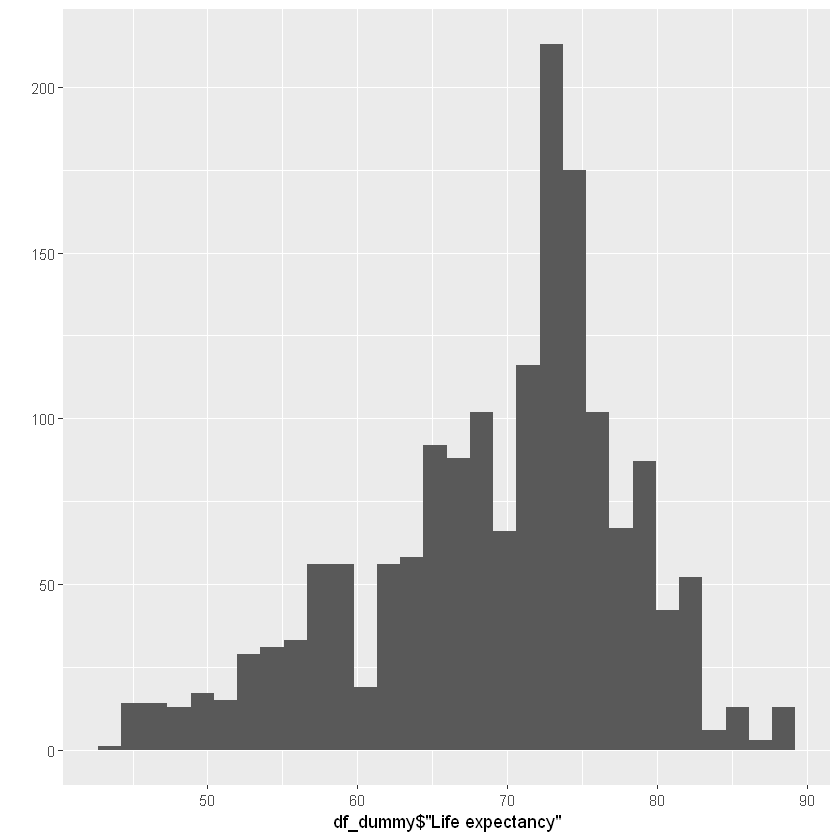

In [12]:
DV

qplot(df_dummy$'Life expectancy', geom="histogram")


### Exercise 6 - perform multiple linear regression 
---

1. Run a linear regression to see if your target variables predict life expectancy 
2. display a summary of the regression 

In [37]:
IV
DV
head(df_dummy)

Life_lm = lm(`Life expectancy` ~ Status_Developing + `percentage expenditure` + GDP + `Total expenditure` + Schooling, data = df_dummy) 
summary(Life_lm) 




# IV - Adult Mortality, Alcohol, GDP, Population, Schooling
# DV - Life expectancy

[1] "Life Expectancy"

[1] "status"                 "Percentage expenditure" "Total expenditure"     
[4] "GDP"                    "schooling"

Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Afghanistan,2015,65.0,263,62,0.01,71.279624,65,1154,19.1,...,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1,1
Afghanistan,2014,59.9,271,64,0.01,73.523582,62,492,18.6,...,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0,1
Afghanistan,2013,59.9,268,66,0.01,73.219243,64,430,18.1,...,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9,1
Afghanistan,2012,59.5,272,69,0.01,78.184215,67,2787,17.6,...,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8,1
Afghanistan,2011,59.2,275,71,0.01,7.097109,68,3013,17.2,...,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5,1
Afghanistan,2010,58.8,279,74,0.01,79.679367,66,1989,16.7,...,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2,1



Call:
lm(formula = `Life expectancy` ~ Status_Developing + `percentage expenditure` + 
    GDP + `Total expenditure` + Schooling, data = df_dummy)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.1531  -3.0720   0.8147   4.0100  29.1033 

Coefficients:
                            Estimate  Std. Error t value             Pr(>|t|)
(Intercept)              48.51197361  0.83636116  58.004 < 0.0000000000000002
Status_Developing        -2.27682766  0.42890128  -5.309          0.000000121
`percentage expenditure` -0.00018814  0.00015862  -1.186               0.2357
GDP                       0.00011130  0.00002402   4.633          0.000003798
`Total expenditure`      -0.11012583  0.05762269  -1.911               0.0561
Schooling                 1.87572258  0.04751663  39.475 < 0.0000000000000002
                            
(Intercept)              ***
Status_Developing        ***
`percentage expenditure`    
GDP                      ***
`Total expenditure`      .  
Schooling    

### Exercise 7 - summary of results
---
Write some comments on your findings
* what variables significantly predict life expectancy?
* how well do your variables / model account for the variance (change) in life expectancy between countries?
* how does the slope (estimates) for each significant variable explain the impact on the IV 

In [ ]:
# what variables significantly predict life expectancy?
# Status, GDP, schooling

# how well do your variables / model account for the variance (change) in life expectancy between countries?
# ? 

# how does the slope (estimates) for each significant variable explain the impact on the IV
# Status: Negatively correlated
# GDP: Positively correlated
# Schooling: Positively correlated


### Exercise 8 - checking assumptions
--- 

Check your model meets assumptions

1. check linearity plot
2. check Q-Q plot 
3. Does it meet assumptions?

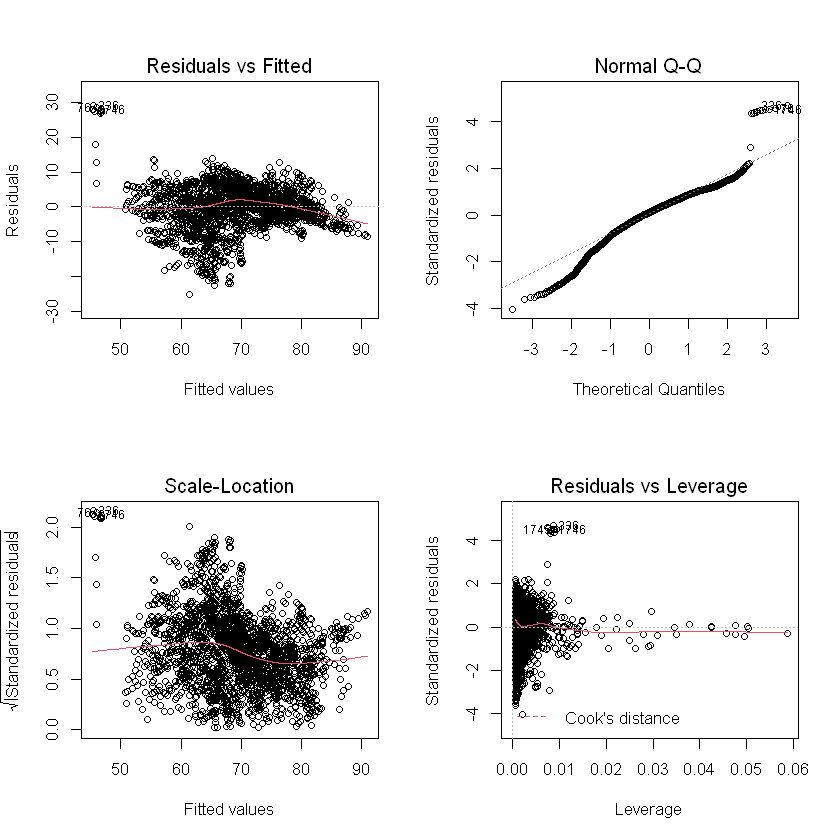

In [39]:
par(mfrow = c(2, 2)) 
plot(Life_lm)

#Assumptions met


### Exercise 9 - contextualise 
--- 

Using the results from your analysis, write a few sentences which gives the data meaning 
* tell a story with the data
* what does this tell us about life expectancy?
* what makes the biggest impact on life expectancy?

### Exercise 10 - Explore the data further
---

Try running a regression with a different variable as the target variable (e.g. Status) and see if you can make any further predictions 

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer: Running a linear model in R and checking assumptions

## What caused you the most difficulty?

Your answer: Getting R working in Jupyter